# 04. 콕스비례위험모형

In [7]:
library(autoReg)
library(survival)
library(survminer)
library(flextable)
library(ftExtra)
library(tidyverse)
library(tidymodels)
library(interpretCI)
tidymodels::tidymodels_conflicts()

── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

# 
# 
### 4-1 콕스PH모형에 적합시킨 여러 모형의 비교
- 콕스PH모형은 위험함수에,**공변량에 대한 회귀식을 포함하는 모형으로 생존시간 데이터의 분포에 대한 가정이 필요없음**
- 추정된 회귀계수로부터 위험비를 구함
- **콕스비례위험모형에서는 ```coef```로 부터 위험비(hazard ratio, HR)가 계산**

# 
- 모형1의 설명변수 : ```rx```
- 모형2의 설명변수 : ```logWBC```
- 모형3의 설명변수 : ```rx``` $\times$ ```logWBC``` (상호작용항)

# 

#### ```coxph()```
- ```coef``` : 회귀계수
- ```se(coef)``` : 회귀계수의 표준오차
- ```z``` : z통계량
    - 회귀계수를 회귀계수의 표준오차로 나눈 ```Wald```통계량
    - **```Wald``` 검정**
        **- 귀무가설 : $H_0 :\;coefficent = 0$**
- ```Pr(>|z|)``` : 변수별 p-value

# 

#### $HR = e^{coef} = e^{1.572} \approx 4.817$

In [45]:
fit1 = coxph(Surv(time, status) ~ rx, data = anderson)
gaze(fit1) %>% myft()

Usage of empty symbol '' with footnote should not happen, 
use `add_footer_lines()` instead, it does not require any symbol. 
This usage will be forbidden in the next release. Please, wait for 10 seconds!



a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 1 row(s) 
original dataset sample: 
————————————————————————————————————————————————————————————
       coef  se(coef)      z  Pr(>|z|)     HR  lower   upper 
————————————————————————————————————————————————————————————
rx    1.572     0.412  3.812     <.001  4.817  2.147  10.809 
————————————————————————————————————————————————————————————
n=42, events=30, Likelihood ratio test=16.35 on 1 df (p<.001) 

# 

In [46]:
fit2 = coxph(Surv(time, status) ~ rx + logWBC, data = anderson)
gaze(fit2) %>% myft()

Usage of empty symbol '' with footnote should not happen, 
use `add_footer_lines()` instead, it does not require any symbol. 
This usage will be forbidden in the next release. Please, wait for 10 seconds!



a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 2 row(s) 
original dataset sample: 
————————————————————————————————————————————————————————————————
           coef  se(coef)      z  Pr(>|z|)     HR  lower   upper 
————————————————————————————————————————————————————————————————
rx        1.386     0.425  3.263      .001  3.999  1.739   9.195 
logWBC    1.691     0.336  5.034     <.001  5.424  2.808  10.478 
————————————————————————————————————————————————————————————————
n=42, events=30, Likelihood ratio test=46.71 on 2 df (p<.001) 

# 
- 모형3의 ```rx```의 z통계량 = 1.393 
    - => p-value > 0.05 => 귀무가설 기각X => 통계적으로 유의하지 않음
- **```n = 42```** : 데이터 크기
- **```events = 30```** : 사건 발생횟수

# 

- **가능도비 검정(likelihood ratio test) : 설명변수가 하나도 없는 영모형(null model)의 로그가능도와 현재 모형의 로그 가능도를 비교** 
    - **$-2\;\times\;(영모형의\;로그가능도)\;-\;(-2\;\times\;현재모형의\;로그가능도)$**

In [27]:
fit3 = coxph(Surv(time, status) ~ rx * logWBC, data = anderson)
gaze(fit3) %>% myft()

Usage of empty symbol '' with footnote should not happen, 
use `add_footer_lines()` instead, it does not require any symbol. 
This usage will be forbidden in the next release. Please, wait for 10 seconds!



a flextable object.
col_keys: ` `, `coef`, `se(coef)`, `z`, `Pr(>|z|)`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 3 row(s) 
original dataset sample: 
———————————————————————————————————————————————————————————————————————
               coef  se(coef)       z  Pr(>|z|)      HR  lower    upper 
———————————————————————————————————————————————————————————————————————
rx            2.375     1.705   1.393      .164  10.750  0.380  304.162 
logWBC        1.872     0.451   4.148     <.001   6.504  2.685   15.755 
rx:logWBC    -0.318     0.526  -0.604      .546   0.728  0.260    2.040 
———————————————————————————————————————————————————————————————————————
n=42, events=30, Likelihood ratio test=47.07 on 3 df (p<.001) 

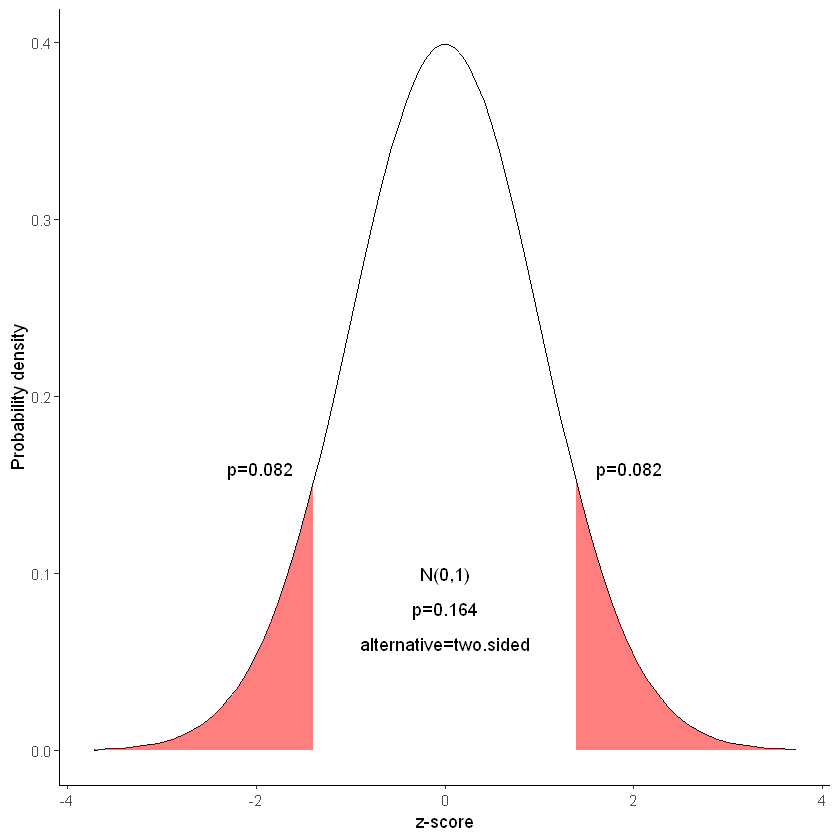

In [28]:
draw_n(z = 1.392962)

- **LR통계량은 공변량의 개수를 자유도로 하는 $\chi^2$분포를 따름**

In [32]:
pchisq(47.07, df = 3, lower.tail = F)

[1] 3.358463e-10

- rx계수의 95% 신뢰구간

In [29]:
tidy(fit3)$estimate[1] - 1.96 * tidy(fit3)$std.error[1]
tidy(fit3)$estimate[1] + 1.96 * tidy(fit3)$std.error[1]

[1] -0.9678018

[1] 5.717622

- HR의 95% 신뢰구간

In [30]:
exp(tidy(fit3)$estimate[1] - 1.96 * tidy(fit3)$std.error[1])
exp(tidy(fit3)$estimate[1] + 1.96 * tidy(fit3)$std.error[1])

[1] 0.3799173

[1] 304.1807

# 
#### 3번째 모형과 2번째 모형의 가능도비검정
- 자유도 : **두 모형의 설명변수 개수 차이** (3 - 2 = 1)

In [50]:
wt_st = -2 * (fit2$loglik[2] - fit3$loglik[2])
pchisq(wt_st, df = 1, lower.tail = F)

[1] 0.5488232

# 
- 본 가능도비 검정의 p-value(0.548823)는, 모형3의 상호작용항에 대한 Wald 검정의 p-value(0.546)과 같지는 않지만, 거의 비슷함
- **만약 두 검정 결과가 다르다면 가능도비 검정이 보다 좋은 통계학적 특성을 가지고 있기 때문에, 가능도비 검정을 사용**

# 
#### AIC(Akaike information criterion) 기준 모형 비교
- **$AIC\;=\;2k\;-2Log(\hat{L})$** : 낮을수록 좋은 모형
    - $k$ : 공변량의 개수
    - $-2Log(\hat{L})$ : 로그가능도

In [52]:
2 * (3) - 2 * fit3$loglik[2] 

[1] 145.2968

#### ```drop1()``` : 현재모형과 설명변수를 1개 제거한 모형의 AIC값 비교

In [60]:
drop1(fit3)

,Df,AIC
,<dbl>,<dbl>
<none>,NA,145.2968
rx:logWBC,1,143.6562


- **모형3의 AIC값이 145.3이며, ```rx:logWBC```를 제거한 모형의 AIC값이 낮음을 확인 => 모형3보다 모형2가 좋은 모형**

# 
#### 모형1과 모형2의 비교
- **가능도비 검정결과, 모형2의 예측변수 ```logWBC```는 통계적으로 유의한 변수**
    - **=> 모형2가 가장 좋은 모형**

In [61]:
LR = -2 * (fit1$loglik[2] - fit2$loglik[2])
pchisq(LR, df = 1, lower.tail = F)

[1] 3.587325e-08

# 
#### 결론 : ```rx```에 대하여 ```logWBC```의 효과를 보정한 후 치료효과는 통계적으로 유의하며, 위험비는 4.0으로 추정

In [63]:
gaze(fit2)

,,coef,se(coef),z,Pr(>|z|),HR,lower,upper
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rx,rx,1.386,0.425,3.263,.001,3.999,1.739,9.195
logWBC,logWBC,1.691,0.336,5.034,<.001,5.424,2.808,10.478


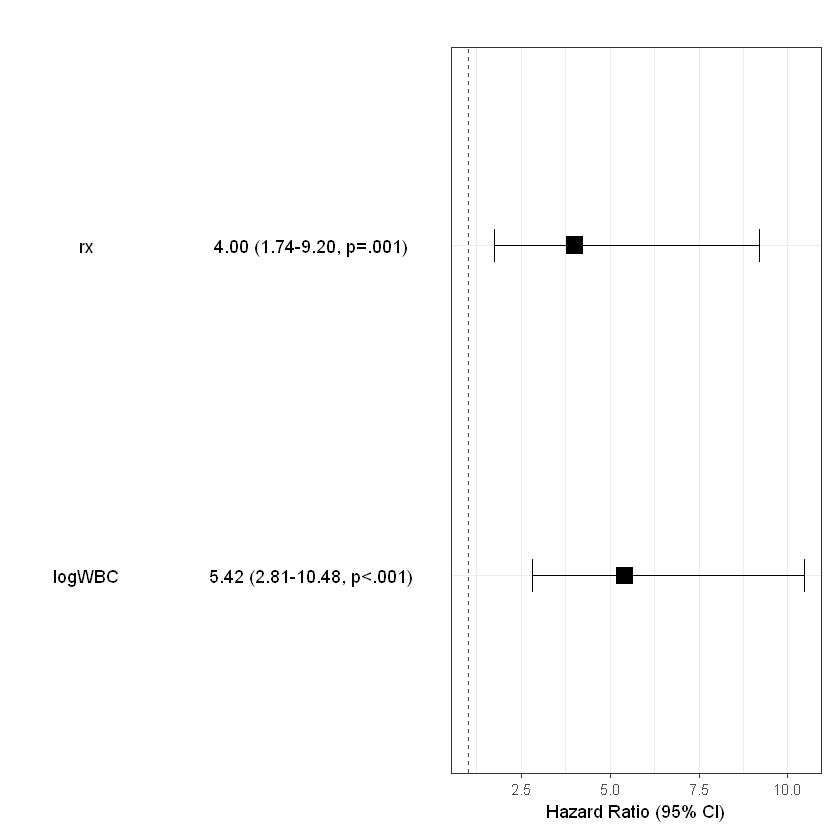

In [64]:
modelPlot(fit2)

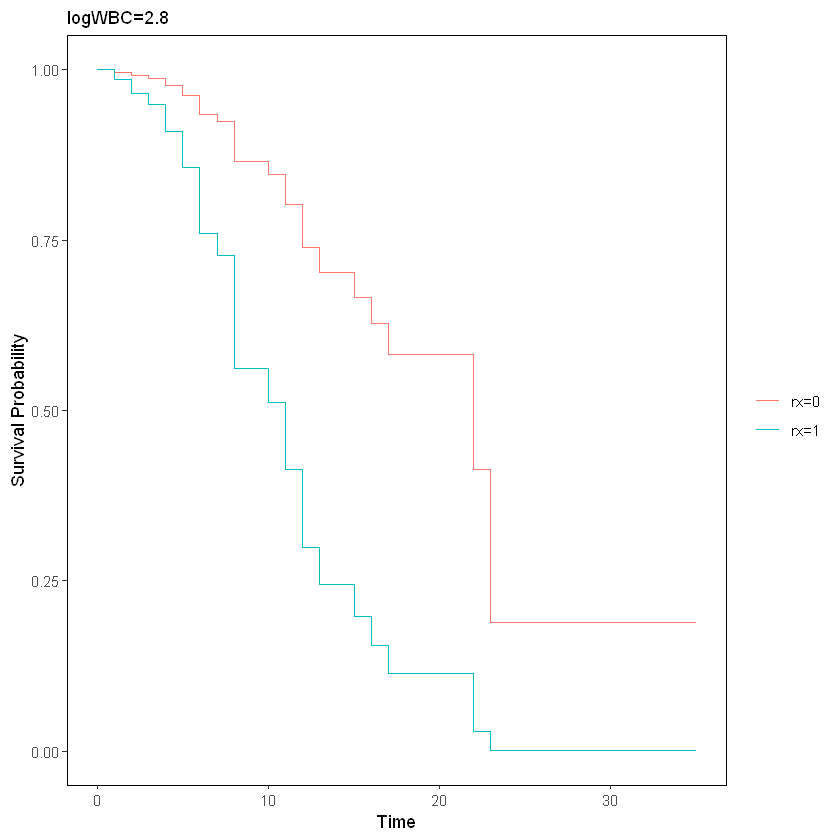

In [65]:
adjustedPlot(fit2, xnames = "rx")

# 
# 
### 4-2 콕스PH모형식
#### 설명변수 $X\;=\;(X_1, X_2, ..., X_p)$가 있는 콕스비례위험모형의 위험함수 
#### $h(t, X) = h_0(t)\;\times\;e^{\sum^p_{i=1}\beta_i X_i}$
- **설명변수 X를 가진, 어떤 대상의 t시간에서의 위험**

| $h_0(t)$ | $exp(\sum^k_{i=1} \beta_i X_i)$ |
| - | - |
| 기저 위험함수 (baseline hazard function) | 지수함수 (exponential) | 
| $t$의 함수 | $X$의 함수 | 
| $X$와 무관 | $t$와 무관 |
| | $X$는 $t와 독립$ (time-independent) |

- *X가 시간에 의존하는 경우 -> 시간의존 공변량(time-dependent covariate)* 
    - *시간에 따라 변화하지 않는 공변량의 예 : 성별, 흡연여부*
        - *흡연상태는 시간에 따라 변화할 수도 있지만, PH모형에서는 분석을 위해 한번 결정하면 불변하는 것으로 가정*
    - *시간에 따라 변화하는 변수 : 나이, 몸무게 등*
    
# 

#### 콕스PH모형식에서 모든 공변량이 0일 경우 :
- $t$에서의 위험함수는 $h_0(t)$와 같아짐
#### $h(t, X) = h_0(t)\;\times\;e^{\sum^{p}_{i=1} \beta_i X_i}$
#### $= h_0(t) \;\times\;e^0 <- X_1 = X_2 = ... X_p = 0$ = $h_0(t($
- 공변량이 없는 경우에도 시간 t에서의 위험함수 $h(t, X) = h_0(t)$
- **콕스PH모형의 기저위험함수는 모수적 가정을 하지 않음 -> 준모수적방법 (semiparametric)**
    - **기저위험함수의 분포가 알려져 있지 않음**
    - **기저위험함수의 분포가 알려져 있는 경우도 존재 (예: 와이블 모형 (Weibull model))**

# 
# 
### 4-3 콕스PH모형의 강점
1. **기저위험함수의 분포에 대한 가정 없이도 회귀계수 및 위험비를 추정**
    - **콕스PH모형은 매우 강건(robust)하기 때문에**, 정확한 모수적인 모형의 추정 결과와 매우 근접한 추정결과를 얻음
    - 예 : 기저위험함수가 와이블모형을 따른다면, 콕스모형을 통해 와이블 모형의 결과와 근접한 결과를 얻으며, 정확한 모형이 지수모형이라면, 근접한 결과를 얻을 수 있음
    - **그러나, 모수적 모형에 대한 적합도 검정을 시행하더라도, 그 모수적 모형이 맞는지 확신 불가**
        - 모수적인 가정이 의심스러울 경우, 콕스PH모형을 통해 신뢰할 수 있는 결과를 얻을 수 있음
2. **지수 부분 $e^{\sum^p_{i=1} \beta_i X_i}$은 항상 0보다 크기 때문에, 위험비가 0부터 $\infty$의 값을 가질 수 있음**
3. **기저위험함수인 $h_0(t)$를 계산할 필요 없이 회귀계수 및 위험비의 추정이 가능하며, 보정된 생존곡선을 얻을 수 있음**
4. **생존시간 및 중도탈락에 대한 정보가 있다면, 보다 많은 정보를 사용할 수 있음 -> 로지스틱 회귀모형보다 선호**

# 
# 
### 4-4 콕스PH모형에서 회귀계수의 추정
- 콕스모형에서 사용하는 가능도함수는 부분가능도(partial likelihood) : **실패한 대상의 확률만을 고려하고, 중도절단된 대상들의 확률은 명시적으로 고려하지 않음**
    - **$k$개의 실패시간에 해당하는 여러 가능도의 곱들로 표현 가능** 
    - => **f번째 실패시간의 가능도인 $L_f$는 그 시점까지 생존했다는 조건하에 그 시간에 실패할 가능성을 나타내는 조건부 확률**
    - **($j$번째 실패시간까지 생존한 위험의 대상들을 "risk set" $R(t_{(f)}$라고 표현)**
    
#### $L = L_1 \;\times\; L_2 \;\times\; .... \;\times\;L_k \;=\;\Pi^k_{j=1}L_j$

# 
- 부분가능도함수는 실패한 대상의 확률만을 고려하지만, 중도절단된 대상들의 **중도절단되기 전까지의 생존시간을 고려하기 떄문에**, $f$번째 실패시간 이후에 중도절단된 대상들은 $L_j$를 계산할 때 risk set으로 사용
- 주어진 모형에서 가능도함수가 만들어지면 가능도를 최대화 (로그가능도함수를 미분한 방정식의 해)
#### ${\delta log L} \over {\delta \beta_i} = 0$,  $\;\;i = 1, 2, 3, ... , p\;\;$  ($p = number\;\;of\;\;parameter$)

# 
#### 최대 부분 가능도추정량 $\hat{\beta}$를 기반으로 누적위험함수를 구함 (Breslow 추정량)
#### $\hat{H_0(t) = \sum_{t_i \;<\;t} \hat{h_0(t)}} = \sum_{t_i \;<\;t} {1 \over {\sum_{j\in R_j}e^{\beta x_i}}}$

# 
#### 모형2의 위험함수

In [68]:
gaze(fit2) 

,,coef,se(coef),z,Pr(>|z|),HR,lower,upper
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rx,rx,1.386,0.425,3.263,.001,3.999,1.739,9.195
logWBC,logWBC,1.691,0.336,5.034,<.001,5.424,2.808,10.478


#### 위험함수 : $\hat{t, X}\;=\;\hat{h_0}(t) \;\times\; e^{1.386\;rx\;+\;4.691\;logWBC}$

# 
# 
### 4-5 위험비의 계산
#### 위험비 : 어떤 대상의  위험을 다른 대상의 위험으로 나눈 값
- **(설명변수 X가 다른 대상)**
- 어떤 대상의 설명변수들을 $X^*$라 하고, 다른 대상의 설명변수들을 X라고 할 때

# 
#### $\hat{HR} = {{\hat{h}(t, X^*)} \over {\hat{h}(t, X)}}$
- 위험비가 1보다 작은 경우보다, 1보다 큰 경우가 해석하기 쉬움 -> **위험이 큰 대상을 $X^*$(대조군)로 하고, 작은 대상을 $X$(치료군)으로 설정**
#### $\hat{HR} = {{\hat{h_0(t)}\;\times\;e^{\sum^p_{i=1} \hat{\beta} X^*_i}} \over {\hat{h_0(t)}\;\times\;e^{\sum^p_{i=1} \hat{\beta} X_i}}} = e^{\sum^p_{i=1}\beta_i(X^*_i - X_i)} = exp(\sum^p_{i=1} \hat{\beta_i} (X^*_i- X_i))$
    - 기저위험함수가 사라지고 **설명변수와 회귀계수만 남게됨** => **즉, 위험비는 시간이 변하더라도 불변** => **비례위험**

# 
- 모형2
#### $\hat{HR} = exp(\hat{\beta_1} (X^*_1- X_1)\;+\;\hat{\beta_2} (X^*_2- X_2)) = exp(1.386 (rx^*-rx)\;+\;1.691 (logWBC^*- logWBC))$

In [70]:
gaze(fit2)

,,coef,se(coef),z,Pr(>|z|),HR,lower,upper
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rx,rx,1.386,0.425,3.263,.001,3.999,1.739,9.195
logWBC,logWBC,1.691,0.336,5.034,<.001,5.424,2.808,10.478


# 
# 
### 4-6 콕스PH모형을 이용한 보정된 생존곡선
- logWBC = 2.8로 보정된 생존곡선

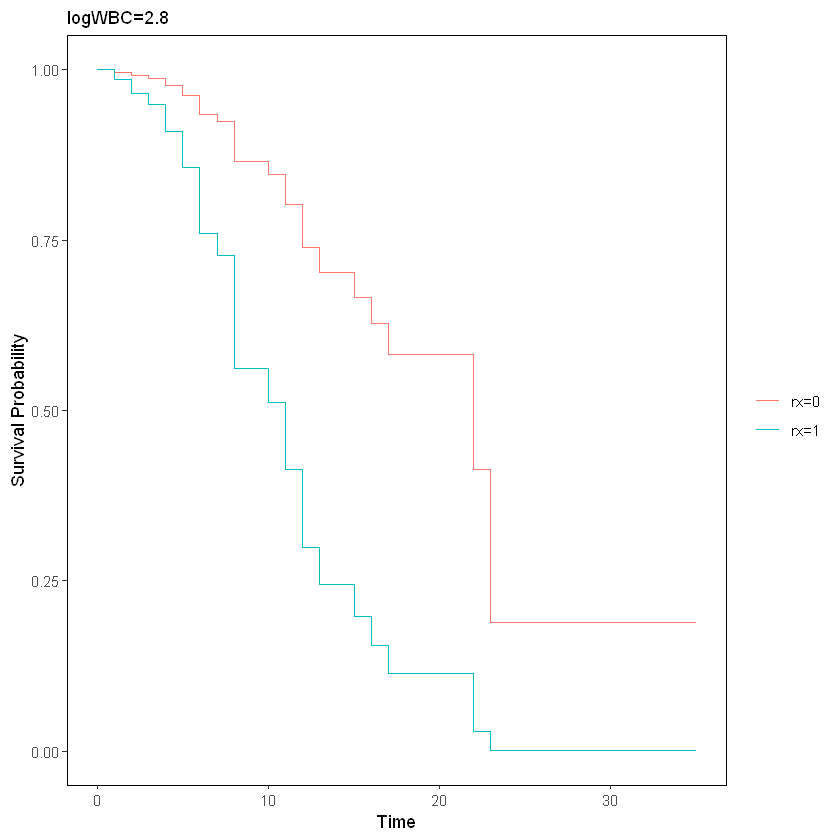

In [75]:
fit = coxph(Surv(time, status) ~ rx + logWBC, data = anderson)
adjustedPlot(fit, data = anderson, xnames = "rx")

# 
- 설명변수가 여러 개 있는 경우

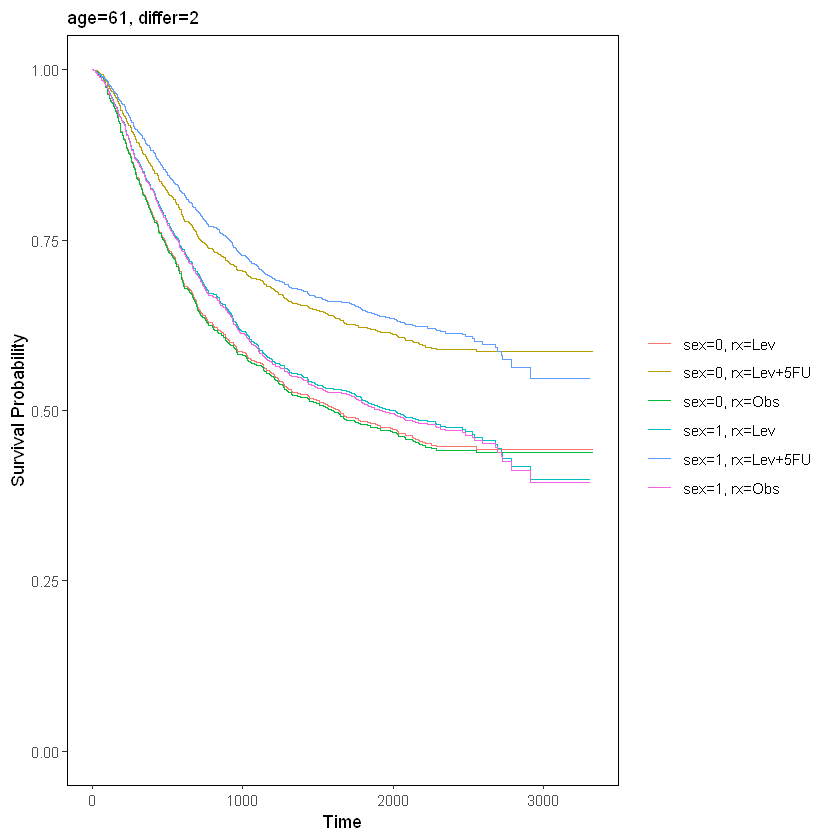

In [76]:
data(cancer, package = "survival")
fit = coxph(Surv(time, status) ~ rx + strata(sex) + age + differ, data = colon)
adjustedPlot(fit, xnames = c("sex", "rx"))

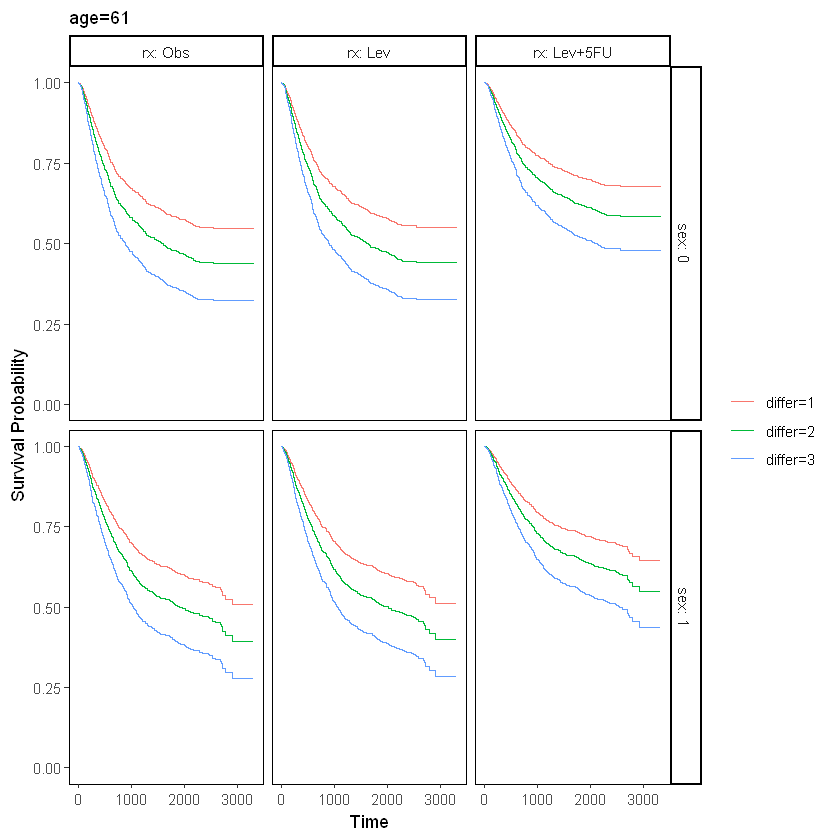

In [80]:
adjustedPlot(fit, xnames = c("rx", "sex", "differ"), facet = c("sex", "rx"))

# 
# 
### 4-7 콕스가능도
- 가능도함수는 결과변수의 분포에 의존하지만, 콕스모형은 결과변수인 **'실패할 때 까지의 시간(time to event)'**에 대해 가정하지 않음
- **따라서, 다른 모수모형처럼 완전한 가능도함수는 만들어지지 않으며, 이벤트의 분포가 아닌 관찰된 순서에 의존하여 콕스가능도(Cox likelihood)가 만들어짐 (부분가능도)**

|id|time|status|smoke|
|-|-|-|-|
|A|2|1|1|
|B|3|1|0|
|C|5|0|0|
|D|8|1|1|

- A는 t = 2에 사건발생
- B는 t = 3에 발생
- C는 t = 5에 중도절단
- D는 t = 8에 발생

#### $h(t) = h_0(t)e^{\beta_1\;Smoke}$
# 

| id|Hazard|
|-|-|
| A | $h_0(t)$ $e^{(\beta_1)}$ |
| B | $h_0(t)$ $e^{(0)}$ |
| C | $h_0(t)$ $e^{(0)}$ |
| D | $h_0(t)$ $e^{(\beta_1)}$ |

- 각자의 위험도가 콕스가능도에 영향 -> $Smoke$가 1인 경우 이벤트 발생확률에 영향을 미침

#### $L_1 = {{h_0(t)\;e^{\beta_1}}\over{h_0(t)\;e^{\beta_1}\;+\;h_0\;(t)e^{0}\;+\;h_0\;(t)e^{0}\;+\;h_0\;(t)e^{\beta_1}}}$
#### $L_2 = {{h_0(t)\;e^{0}}\over{h_0(t)\;e^{0}\;+\;h_0\;(t)e^{0}\;+\;h_0\;(t)e^{\beta_1}}}$
#### $L_3 = {{h_0(t)\;e^{\beta_1}}\over{h_0(t)\;e^{\beta_1}}}$
#### $L = L_1 \times L_2 \times L_3$
- **콕스가능도는 기저위험함수가 각 식에서 약분되어 사라짐** => 기저위험함수를 구체화할 필요가 없음
- **콕스가능도는 이벤트의 발생순서와 중도절단의 발생순서에 의해 결정되며 분포에 의존X**

# 

#### 데이터 $k$개의 실패시간이 있을 때, $f$번째 실패시간의 가능도를  $L_f$라고 한다면, 콕스가능도는 $k$개 항의 곱으로 표현
#### $L = L_1 \;\times\; L_2\;\times\; ... L_k = \Pi^k_{f=1}L_f$
#### 콕스가능도 $L$을 최대화하는 회귀계수의 값을 추정 :
- **콕스가능도의 자연로그를 편미분한 식을 0으로 만드는 해 (스코어함수와 정보행렬을 이용)**
    - **${{\delta ln L}\over {\delta \beta_i}} = 0,\;\;\;(i=1, 2, 3, ...p)\;\;\;(p\;=\;number\;of\;parameter)$**

# 
#### 콕스가능도, 로그콕스가능도, 스코어함수
#### 콕스가능도 : $L(\beta) = [{{e^\beta}\over{2e^\beta + 2}}]\times[{1\over{e^\beta + 2}}]\;\times\;1={{e^\beta \over {(2e^\beta + 2)\;\times\;(e^\beta + 2)}}}$

# 

#### 로그콕스가능도 : $l(\beta)=log({{e^\beta}\over{(2e^\beta + 2)\;\times\;(e^\beta + 2)}})=log(e^\beta)-log(2e^\beta+2)-log(e^\beta+2)$

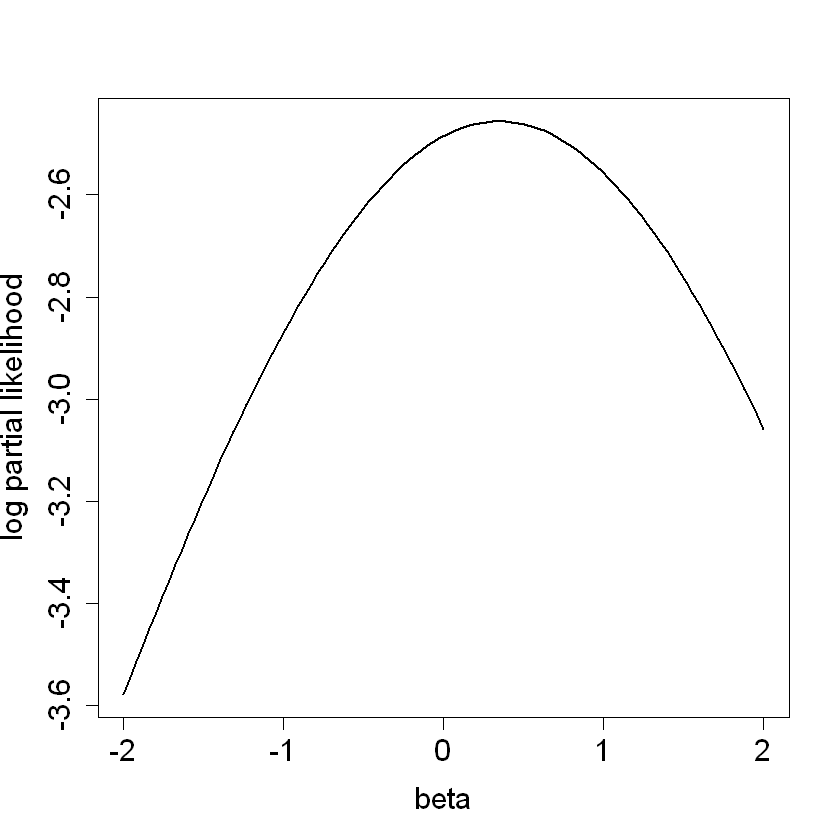

In [82]:
p1 <- function(beta) {
    psi <- exp(beta)
    result <- log(psi) - log(2*psi+2)-log(psi+2)
    return(result)
}

beta = seq(-2, 2, length.out = 100)
plot(p1(beta) ~ beta, type = "l", xlab = "beta", ylab = "log partial likelihood",
     cex.axis = 1.5, cex.lab = 1.5, lwd = 2, col = "black")

# 
#### 스코어함수 : 로그가능도함수의 도함수
#### $U(\beta)=l'(\beta)=(log(e^\beta)-log(2e^\beta+2)-log(e^\beta+2))'$ = ${{e^\beta}\over{e^\beta}}-{{2e^\beta}\over{2e^\beta + 2}}-{{e^\beta}\over{e^\beta+2}}$ = $1-{{2e^\beta}\over{2e^\beta +2}}-{{e^\beta}\over{e^\beta+2}}$

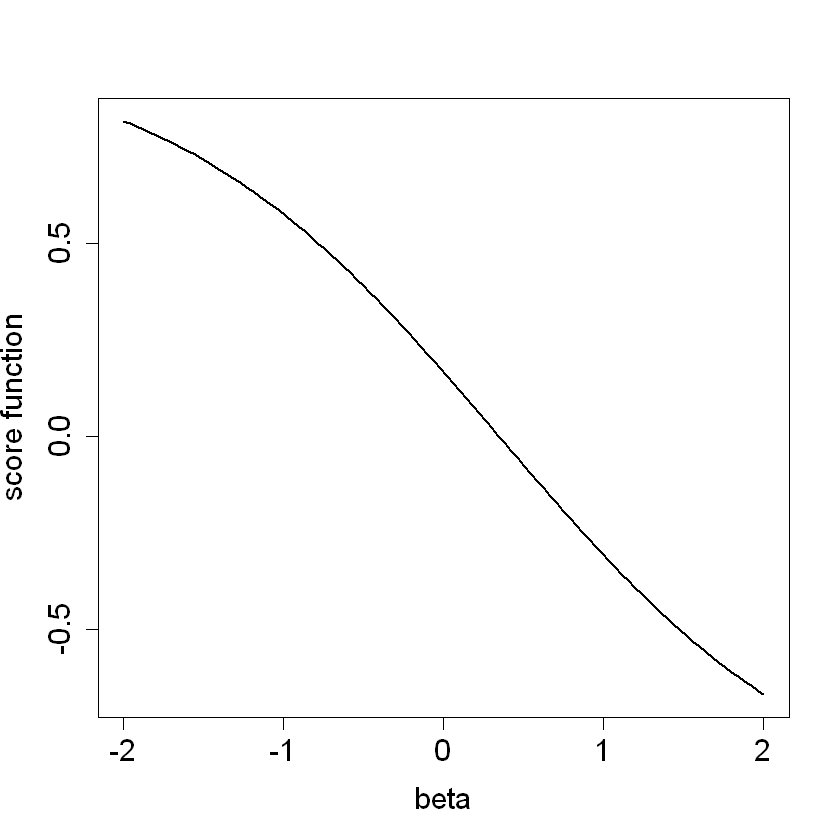

In [83]:
scoref = function(beta) {
    psi <- exp(beta)
    result = 1 - 2 * psi / (2 * psi + 2) - (psi / (psi + 2))
    return(result)
}

plot(scoref(beta) ~ beta, type = "l", xlab = "beta", ylab = "score function",
     cex.axis = 1.5, cex.lab = 1.5, lwd = 2, col = "black")

# 
#### 로그가능도함수의 값이 최대가 되는 $\beta$의 값이 회귀계수의 추정치 [최대 부분가능도 추정량  (Maximum partial likelihood estimate, MPLE)]
#### ```optim()``` : MPLE 계산 함수

In [85]:
result = optim(par = 0, fn = p1, method = "L-BFGS-B",
               control = list(fnscale = -1), lower = -3, upper = 1)
result$par

[1] 0.3465736

- **스코어함수의 값이 0이되는 $\beta$의 값과 동일**
    - = 콕스모형에서 회귀계수의 추정치

#### ```uniroot()```

In [87]:
result1 <- uniroot(f = scoref, interval = c(-5, 5), tol = .Machine$double.eps)
result1$root

[1] 0.3465736

# 
- 귀무가설인 $\beta = 0$에 해당하는 로그부분가능도함수 값

In [92]:
p1(0)

[1] -2.484907

- (0, -2.4845)에서 로그부분가능도함수 곡선의 기울기는 스코어함수의 값 (기울기는 도함수니까 당연한 거 아님?)
- **이 값은 로그순위검정의 U통계량과 동일**-

#### 즉, 로그순위검정에서의 관찰값-기대값의 합계와 동일 

In [93]:
scoref(0)

[1] 0.1666667

# 
# 
#### 4-8 여러 개의 공변량이 있을 때 콕스부분가능도 (다항콕스모형)
($i번째\;\;공변량\;\;z_i의\;\;회귀계수를\;\;\beta라고\;\;할\;\;때$, $\psi = e^{z_i \beta}$)
- **부분가능도는 각 실패시간 (1부터 j)의 가능도의 곱으로 계싼되며, j번째 실패시간 $t_j$의 가능도는 위험대상 $R_j$의 모든 위험을 분모로하고, 위험대상 $R_j$중 실패를 경험한 대상의 위험이 된다**

#### 콕스부분가능도 $L(\beta) = \Pi^D_{j=1} {{h_0(t_j)\;\psi_j}\over{\sum_{k \in R_j}}\;h_0(t_j)\;\psi_k}=\Pi^D_{j=1}{{\psi_j}\over{\sum_{k \in R_j \psi_k}}}$
#### ($D\;\;=\;\;위험대상\;\;중\;\;사망한\;\;수$)

# 
#### 로그콕스부분가능도 $l(\beta) = \sum^D_{j=1}[log(\psi_j) - log(\sum_{k \in R_j}\psi_k)]=\sum^D_{j=1}z_j\beta - \sum^D_{j=1} log (\sum_{k\in R_j}e^{z_k\beta})$
#### $(log(\psi_j) = z_j \beta), \;\;\; z_{ij} = {{\delta log(\psi_j)}\over{\delta \beta_l}}$

# 
#### 스코어함수 : $S_l(\beta) = {{\delta l(\beta)}\over{\delta \beta_l}} = \sum^D_{j=1}[z_{jl}{{\sum_{k \in R_j} z_{jk}\;e^{z_j \beta}}\over{\sum_{k\in R_j}\;e^{z_j \beta}}}]$

# 
#### k개의 공변량들의 모든 가능한 조합을 갖는 로그부분가능도를 2번 미분하면 정보행렬 (information matrix)를 얻을 수 있다 (= 헤시안 행렬 (Hessian matrix))
#### $I(\beta; z)=-{{\delta^2 l(\beta)}\over{\delta \beta\;\delta \beta'}} = -{{\delta S(\beta)}\over{\delta \beta}}$

# 
#### 귀무가설 $H_0:\beta = 0$에 대한 Wald 통계량 ($X^2_w$), 스코어통계량 ($X^2_s$), 로그가능도검정통계량 ($X^2_l$)\
- 3개의 통계량 모두, 자유도가 p (설명변수 개수)인 $\chi^2$를 따름
    
#### $X^2_w = \hat{\beta '}I(\hat{\beta};z){\hat{\beta}}$
#### $X^2_s = S'(\beta = 0; z)\;\times\;I^{-1}(\beta = 0; z)\;\times\;S(\beta; z)$
#### $X^2_l = 2\{l(\beta = \hat{\beta})-l(\beta = 0) \}$

In [98]:
coxph(Surv(time, status) ~ rx + logWBC, anderson) %>% summary

Call:
coxph(formula = Surv(time, status) ~ rx + logWBC, data = anderson)

  n= 42, number of events= 30 

         coef exp(coef) se(coef)     z Pr(>|z|)    
rx     1.3861    3.9991   0.4248 3.263   0.0011 ** 
logWBC 1.6909    5.4243   0.3359 5.034  4.8e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

       exp(coef) exp(-coef) lower .95 upper .95
rx         3.999     0.2501     1.739     9.195
logWBC     5.424     0.1844     2.808    10.478

Concordance= 0.852  (se = 0.04 )
Likelihood ratio test= 46.71  on 2 df,   p=7e-11
Wald test            = 33.6  on 2 df,   p=5e-08
Score (logrank) test = 46.07  on 2 df,   p=1e-10
